### Load the data into a Python session as Pandas DataFrame. Check if all columns are in correct type, and fix any incorrect ones if necessary

In [25]:
import pandas as pd

In [26]:
df = pd.read_csv("auto-mpg.csv")

In [27]:
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


### Split the data 75% and 25 testing

In [28]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)

### Visualize necessary columns in the data. After this point, you should have three lists

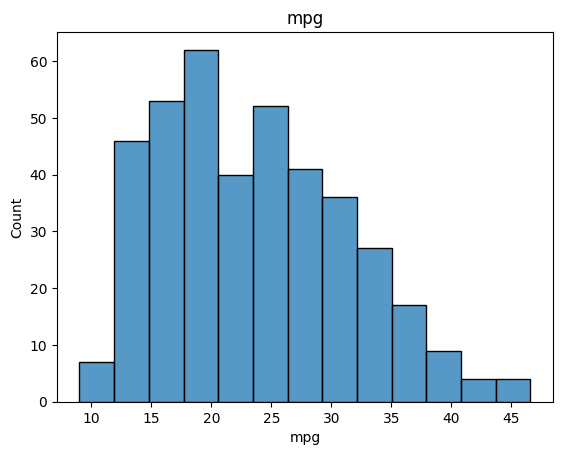

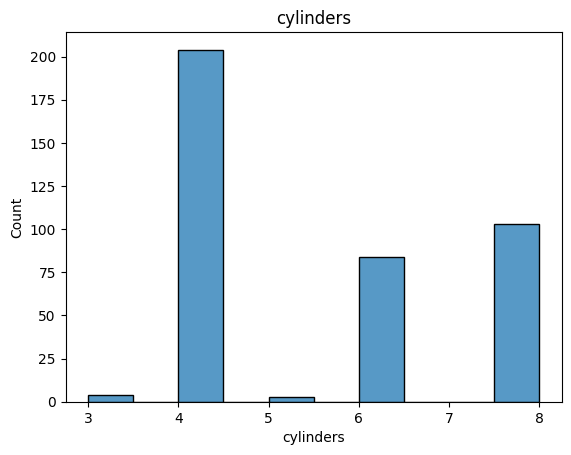

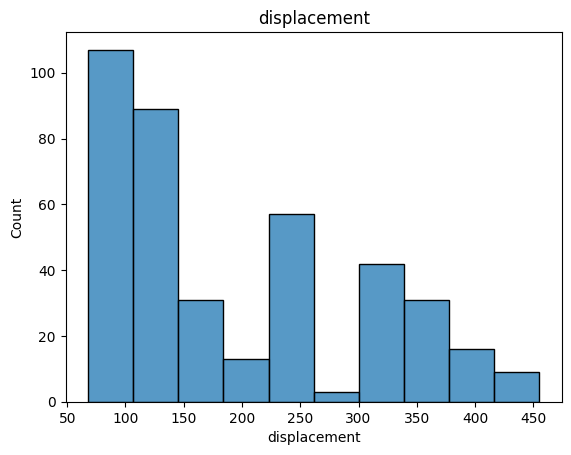

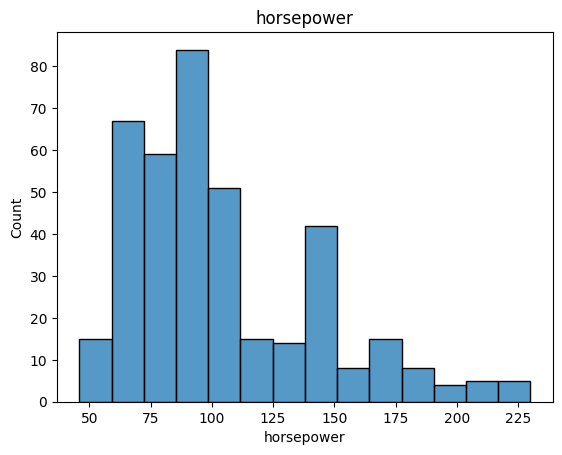

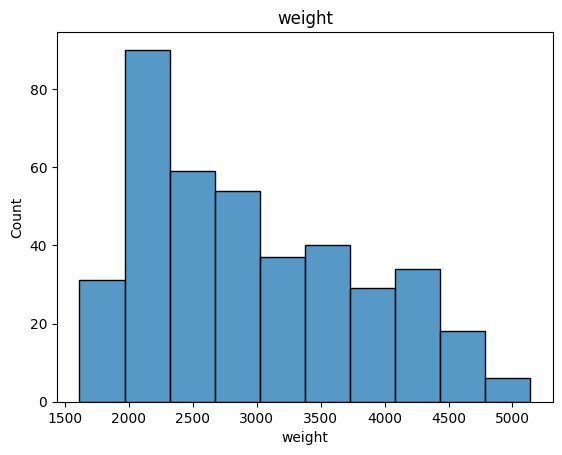

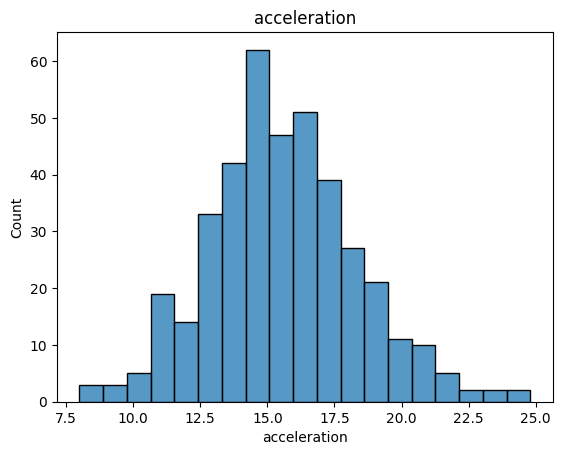

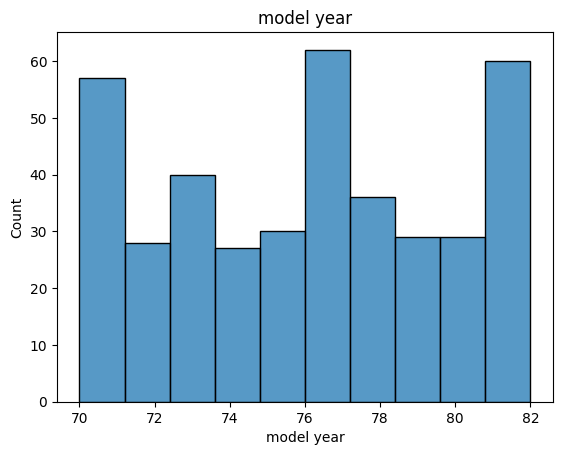

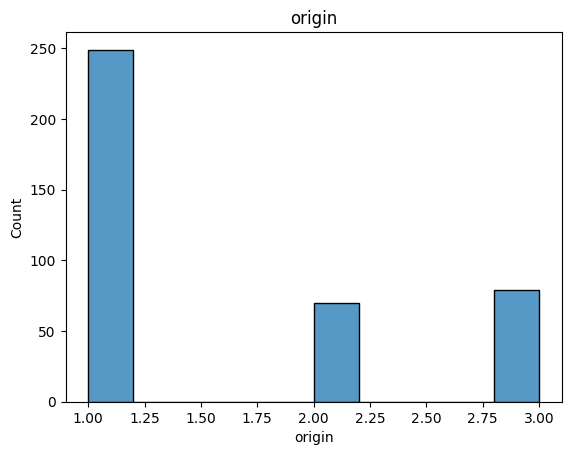

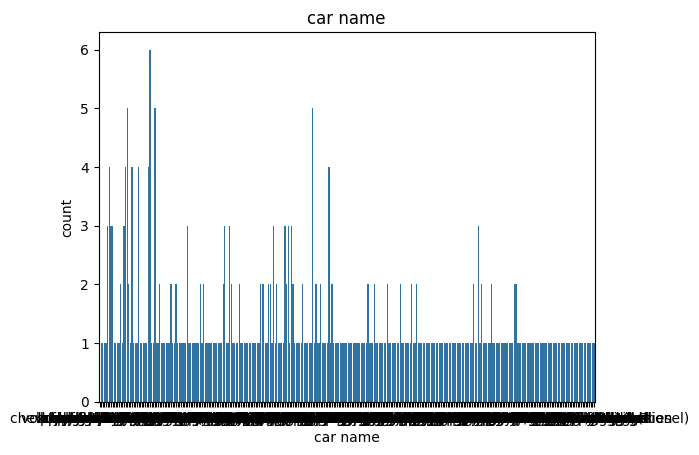

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

symmetric_cols = []
skewed_cols = []
categorical_cols = []


for column in df.columns:
  if df[column].dtype in [int, float]:
    skewness = df[column].skew()
    if abs(skewness) < 0.5:
      symmetric_cols.append(column)
    else:
      skewed_cols.append(column)
    sns.histplot(data=df, x=column)
    plt.title(f'{column}')
    plt.show()
  else:
    categorical_cols.append(column)
    sns.countplot(data=df, x=column)
    plt.title(f'{column}')
    plt.show()

### Build a pipeline

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer

symmetric_pipeline = Pipeline([
  ('imputer', SimpleImputer(strategy='mean')),
  ('scaler', StandardScaler())
])

skewed_pipeline = Pipeline([
  ('imputer', SimpleImputer(strategy='mean')),
  ('log_transform', FunctionTransformer(np.log1p)),
  ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
  ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('numeric_symmetric', symmetric_pipeline, symmetric_cols),
    ('numeric_skewed', skewed_pipeline, skewed_cols),
    ('categorical', categorical_pipeline, categorical_cols)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

### Train the pipeline on the training data. Then perform trainsformation on the training data and testing data

In [31]:
pipeline.fit(df)
train_transformed = pipeline.transform(train_data)
test_transformed = pipeline.transform(test_data)

### Print the shape of the processed training data and processed testing data

In [32]:
train_transformed.shape

(298, 313)

In [33]:
test_transformed.shape

(100, 313)